In [1]:
#Loading necessary libraries
options(tidyverse.quiet = TRUE,
        repr.plot.width = 8,
        repr.plot.height = 5)

library("tidyverse")

In [28]:
#Reading data
global_data <- read_csv("../data/global_data.csv")
eq_data <- read_csv("../data/earthquake_data.csv")
global_data %>% head()
eq_data %>% head()

Parsed with column specification:
cols(
  Entity = col_character(),
  Year = col_double(),
  Deaths = col_double(),
  Counts = col_double(),
  death_per_event = col_double()
)
Parsed with column specification:
cols(
  Country = col_character(),
  Code = col_character(),
  Year = col_double(),
  Death_earthquake = col_double(),
  Death_total = col_double()
)


Entity,Year,Deaths,Counts,death_per_event
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
All natural disasters,1900,1267330,5,253466.000
All natural disasters,1901,18,2,9.000
All natural disasters,1902,46037,9,5115.222
All natural disasters,1903,6506,8,813.250
All natural disasters,1904,0,2,0.000
All natural disasters,1905,22758,4,5689.500


Country,Code,Year,Death_earthquake,Death_total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1990,54,196064.1
Afghanistan,AFG,1991,848,199867.9
Afghanistan,AFG,1992,0,208838.9
Afghanistan,AFG,1993,0,236647.1
Afghanistan,AFG,1994,0,260216.2
Afghanistan,AFG,1995,0,265890.7


In [20]:
#Wrangling global data
glob_filt <- global_data %>%
    filter(Entity != 'All natural disasters' & Year > 1990) %>%
    group_by(Entity) %>%
    summarize(tot_death = sum(Deaths),count = sum(Counts), deaths_per_event = tot_death/count) %>%
    mutate( ToHighlight = ifelse( Entity == 'Earthquake', "yes", "no" ) )
glob_filt

Entity,tot_death,count,deaths_per_event,ToHighlight
<chr>,<dbl>,<dbl>,<dbl>,<chr>
Drought,24295,288,84.357639,no
Earthquake,780695,741,1053.569501,yes
Extreme temperature,170960,490,348.897959,no
Extreme weather,402181,2653,151.594798,no
Flood,192842,3834,50.297861,no
Landslide,25082,493,50.876268,no
Mass movement (dry),1124,25,44.960000,no
Volcanic activity,2484,108,23.000000,no
Wildfire,2256,321,7.028037,no


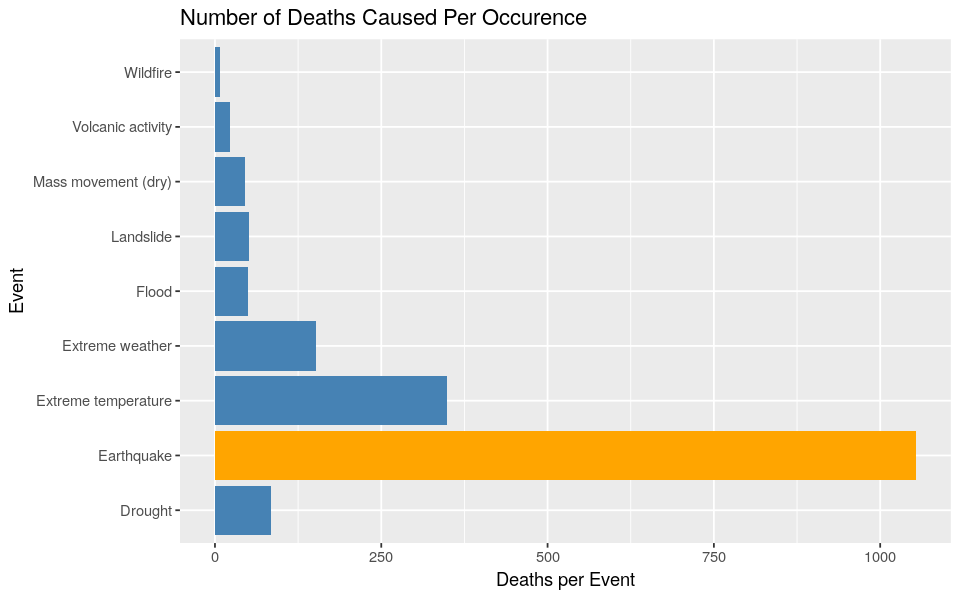

In [53]:
glob_hist <- glob_filt %>%
    ggplot(aes(x = Entity,y= deaths_per_event,fill = ToHighlight)) +
    geom_bar(stat = 'identity')+
    coord_flip()+
    scale_fill_manual( values = c( "yes"="orange", "no"="steelblue" ), guide = FALSE)+
    labs(x = 'Event', y = 'Deaths per Event', title = 'Number of Deaths Caused Per Occurence')
glob_hist

In [29]:
eq_data %>% head()

Country,Code,Year,Death_earthquake,Death_total
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1990,54,196064.1
Afghanistan,AFG,1991,848,199867.9
Afghanistan,AFG,1992,0,208838.9
Afghanistan,AFG,1993,0,236647.1
Afghanistan,AFG,1994,0,260216.2
Afghanistan,AFG,1995,0,265890.7


In [44]:
eq_filt <- eq_data %>% 
    group_by(Year) %>%
    summarize(eq_death = sum(Death_earthquake),tot_death = sum(Death_total), death_rate = (eq_death/tot_death)*100) %>%
    mutate(Year = factor(Year))
eq_filt %>% head()

Year,eq_death,tot_death,death_rate
<fct>,<dbl>,<dbl>,<dbl>
1990,52945,37979421,0.139404443
1991,4262,38482111,0.011075276
1992,3987,38699109,0.010302563
1993,11300,38964235,0.029000955
1994,1447,39592540,0.003654729
1995,5948,39373737,0.015106516


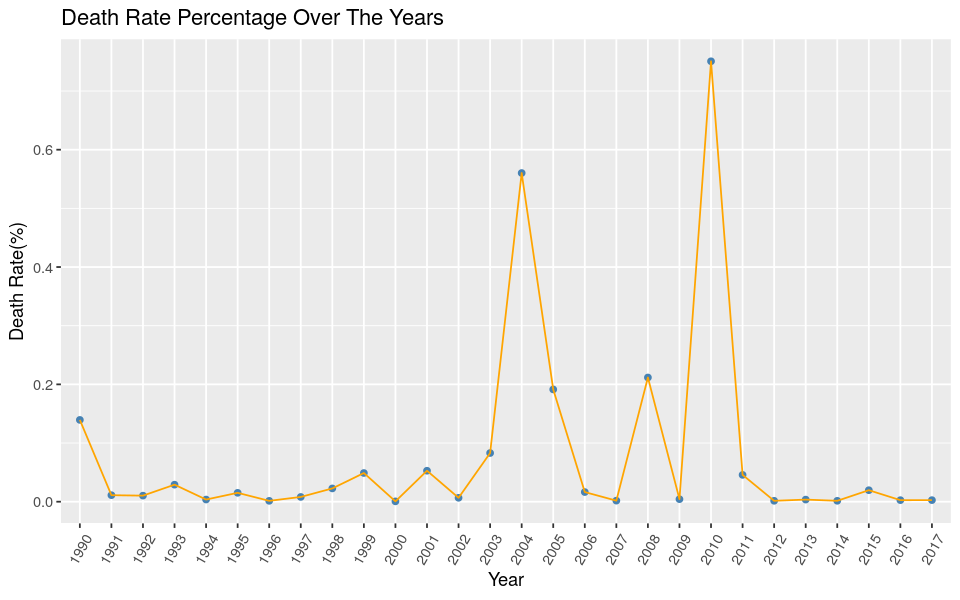

In [51]:
eq_plot <- eq_filt %>%
    ggplot(aes(x= Year, y = death_rate, group =1))+
    geom_point(color = 'steelblue')+
    theme(axis.text.x = element_text(angle = 60, vjust = 0.5))+
    stat_summary(fun.y=sum, geom="line", color = 'orange')+
    labs(x='Year',y = 'Death Rate(%)', title ='Death Rate Percentage Over The Years' )
    
eq_plot